# Preprocessing and clustering Oliver RPM Data for Network Generation

In [70]:
import magic as mg
import pandas as pd 
import scanpy as sc
import pickle
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Loading and Preparing Data

### Here, the data is loaded using Scanpy and then transformed using a Pandas dataframe to prepare it for use in MAGIC within this notebook and SCRABBLE in the R notebook included in the repository.

In [3]:
#Loading in a chemosensitive SCLC tumor sample using Scanpy into their Anndata format
adata= sc.read_10x_mtx('Data')

#Removing genes that entirely unexpressed
sc.pp.filter_genes(adata, min_cells=1)

#Using raw data for imputation, but must convert to dataframe
raw_df = adata.to_df()

print('Dataframe dimensions (cells x genes): ' + str(raw_df.shape))
raw_df.head(3)

Dataframe dimensions (cells x genes): (2582, 22536)


,RP11-34P13.7,RP11-34P13.8,AL627309.1,AP006222.2,RP4-669L17.10,RP5-857K21.2,RP5-857K21.4,RP11-206L10.3,RP11-206L10.2,RP11-206L10.9,...,AC145212.1,MGC39584,AC011043.1,ZNF84-1,AL592183.1,AC011841.1,AL354822.1,PNRC2-1,SRSF10-1,AC145205.1
AAACCTGCACGACTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGGTGGGTCAA-1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0
AAACCTGTCGATCCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
AAACCTGTCGTACGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0
AAACGGGAGTTCGATC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# To save computational time, I am only using this list of 40 nodes that are relevant to my research 

nodes = ['KLF4', 'SOX4', 'TET1', 'TERF2', 'SOX9', 'HMGA1', 'PRDM4', 'MBD3', 'FOXO1', 'MYC', 'FOXM1', 'PITX2', 'CHAMP1',
 'FOXC1', 'NKX2-5', 'DNMT1', 'FOSB', 'YBX1', 'MEOX2', 'REST', 'SNAI2', 'E2F2', 'JUND', 'TET3', 'HEY2', 'SP7', 'HOXB4', 'SOX6', 
 'HIF1A', 'SOX5', 'SPEN', 'CDC5L', 'TBX5', 'MECP2', 'TET2', 'KLF2', 'SP100', 'RREB1', 'MBD1']

sc_input_df = raw_df[nodes]
print('scRNA-seq Dataframe dimensions (cells x genes): ' + str(sc_input_df.shape))
sc_input_df.head(3)

scRNA-seq Dataframe dimensions (cells x genes): (2582, 39)


,KLF4,SOX4,TET1,TERF2,SOX9,HMGA1,PRDM4,MBD3,FOXO1,MYC,...,SOX5,SPEN,CDC5L,TBX5,MECP2,TET2,KLF2,SP100,RREB1,MBD1
AAACCTGCACGACTCG-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGGTGGGTCAA-1,1.0,9.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
AAACCTGTCGATCCCT-1,0.0,9.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Scaling dataframe to match TPM units of bulk RNA-seq

scale_factor = (10**6)/(raw_df.sum(axis=1))
sfdf = pd.DataFrame(scale_factor)
sfdf.columns = ['sf']
scaled_df = sc_input_df.multiply(sfdf['sf'], axis ='index')
scaled_df = scaled_df[nodes]

scaled_df.head(3)

,KLF4,SOX4,TET1,TERF2,SOX9,HMGA1,PRDM4,MBD3,FOXO1,MYC,...,SOX5,SPEN,CDC5L,TBX5,MECP2,TET2,KLF2,SP100,RREB1,MBD1
AAACCTGCACGACTCG-1,0.000000,169.577751,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
AAACCTGGTGGGTCAA-1,76.569678,689.127106,0.0,0.0,0.0,229.709035,0.0,76.569678,0.0,76.569678,...,0.0,76.569678,0.000000,76.569678,76.569678,0.0,0.0,0.0,0.0,0.0
AAACCTGTCGATCCCT-1,0.000000,764.655905,0.0,0.0,0.0,254.885302,0.0,84.961767,0.0,0.000000,...,0.0,0.000000,84.961767,0.000000,169.923534,0.0,0.0,0.0,0.0,0.0


In [9]:
#Loading the bulk RNA-seq data
bulk_df = (pd.read_csv('Data/bulk.csv', index_col=0)).T

print('Dataframe dimensions (samples x genes): ' + str(bulk_df.shape))
bulk_df.head(3)

Dataframe dimensions (samples x genes): (18, 49457)


,5S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,...,snoU109,snoU13,snoU2-30,snoU2_19,snoU83B,snoZ278,snoZ40,snoZ6,snosnR66,yR211F11.2
SC4.435_flank,4,113,28,234,0,0,12,0,1,0,...,8,242,2,3,0,0,0,0,0,8
SC4.613_flank,6,88,37,233,0,2,15,0,0,2,...,7,291,3,2,0,0,0,0,0,11
SC4.616_flank,3,96,28,227,0,1,12,0,1,4,...,7,232,3,7,0,0,0,0,0,6


In [13]:
#For the bulk data, we only care about the sample we are using
input_bulk_df = bulk_df[nodes]
input_bulk_df = pd.DataFrame(input_bulk_df.loc['SC39.739_flank'])
input_bulk_df.columns = ['Expression']
print('Bulk RNA-seq Dataframe dimensions (samples x genes): ' + str(input_bulk_df.shape))

Bulk RNA-seq Dataframe dimensions (samples x genes): (39, 1)


In [50]:
#Saving dataframes for use in R notebook
scaled_df.to_csv('Data/sc_input_df.csv')
input_bulk_df.to_csv('Data/bulk_input_df.csv')

## Performing Imputation with MAGIC

In [29]:
magic_operator = mg.MAGIC()
magic_df = magic_operator.fit_transform(scaled_df, genes=nodes)

Calculating MAGIC...
  Running MAGIC on 2582 cells and 39 genes.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.17 seconds.
    Calculating affinities...
    Calculated affinities in 0.17 seconds.
  Calculated graph and diffusion operator in 0.35 seconds.
  Calculating imputation...
Calculated MAGIC in 0.36 seconds.


## SCRABBLE imputation must be performed in R, see R notebook in repository for this.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Analyzing Results from Imputation

# Note: I should try widening the violins and see if the median dot is more visible

In [30]:
# Loading back in dataframes and results from SCRABBLE

sc_input_df = scaled_df
bulk_input_df = pd.read_csv('Data/bulk_input_df.csv', index_col = 0)
magic_df = pd.read_csv('Data/magic_output.csv', index_col = 0)
scrabble_df = pd.read_csv('Data/scrabble_output.csv', index_col = 0)
scrabble_df = scrabble_df.T

dataframes = {'input':sc_input_df, 'magic':magic_df, 'scrabble': scrabble_df, 'bulk':bulk_input_df}

In [4]:
found_nodes = [ 'KLF4', 'SOX4', 'HMGA1', 'PRDM4', 'MBD3', 'DNMT1', 'FOSB', 'YBX1', 'JUND', 'TET3', 'HEY2', 'CDC5L']


In [16]:
# This function scales the values in a Dataframe by dividing all values by the maximum value in the dataframe, then
# multiplying by a specified scaling factor. 

def normalize(df, scale_factor):
    cols = list(df.columns)
    max_value = df.max(axis=1).max(axis=0)
    max_loc = getIndexes(df, max_value)
    if len(df[cols[0]]) ==1:
        maxValue = df[max_loc[0][1]][0]
    else:
        maxValue =df[max_loc[0][1]][max_loc[0][0]]

    df_n = df.copy(deep=True)

    for i in range(len(cols)):
        col_vals = (df[cols[i]]/maxValue)*scale_factor
        df_n[cols[i]] = col_vals
    return df_n

# Note: function borrowed from https://www.geeksforgeeks.org/find-location-of-an-element-in-pandas-dataframe-in-python/
# This finds the column and row indexes of a value within a Pandas Dataframe
def getIndexes(dfObj, value):
    listOfPos = []
    result = dfObj.isin([value])
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)

    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
             
    return listOfPos

## Transforming Data for Analysis

* For further analysis, scRNA-seq is conventionally scaled up to a total count number, usually 10^4 or 10^6 reads, and then
transformed using a log(x+1). 
* In this case, the data can't be scaled in this manner since we are only considering a subset
of the genes and therefore total reads.
* Instead, I am normalizing the dataframes by scaling each to the highest expression
of any gene, then multiplying by 10^4. 
* This allows for the log(x+1) transform to be applied while ensuring the +1 is negligible,
and also allows the relative expression values between genes to be comnpared across datasets

In [31]:
transformed_dfs = {}
for df in dataframes:
    scaled = dataframes[df] * 10000
    transformed = np.log1p(scaled)
    transformed_dfs[df] = transformed

## Plotting

In [20]:
#Picking out some representative genes to show as example in plot

plot_high =  ['KLF4', 'SOX4', 'HMGA1', 'DNMT1', 'FOSB', 'JUND']
plot_low= ['TERF2', 'SOX9',  'PRDM4', 'MBD3', 'FOXO1', 'FOXM1']

In [63]:
# Plotting violin plot of highly expressed genes

high = plot_high
d1 = []
for column in high:
    dft = pd.DataFrame(transformed_dfs['magic'][column])
    dft['gene'] = column
    d1.append(dft)

for i in range(len(high)):
    if i ==0:
        df_mag = d1[0]
        df_mag.columns = ['Count', 'Gene']
    else:
        df_mag2 = d1[i]
        df_mag2.columns = ['Count', 'Gene']
        df_mag =pd.concat([df_mag, df_mag2])
df_mag['key'] = 'MAGIC'


d2 = []
for column in high:
    dft = pd.DataFrame(transformed_dfs['input'][column])
    dft['gene'] = column
    d2.append(dft)

for i in range(len(high)):
    if i ==0:
        df_raw = d2[0]
        df_raw.columns = ['Count', 'Gene']
    else:
        df_raw2 = d2[i]
        df_raw2.columns = ['Count', 'Gene']
        df_raw =pd.concat([df_raw, df_raw2])
df_raw['key'] = 'Raw'



d3 = []
for column in high:
    dft = pd.DataFrame(transformed_dfs['scrabble'][column])
    dft['gene'] = column
    d3.append(dft)

for i in range(len(high)):
    if i ==0:
        df_scrab = d3[0]
        df_scrab.columns = ['Count', 'Gene']
    else:
        df_scrab2 = d3[i]
        df_scrab2.columns = ['Count', 'Gene']
        df_scrab =pd.concat([df_scrab, df_scrab2])
df_scrab['key'] = 'SCRABBLE'


final_df = pd.concat([df_mag, df_raw, df_scrab])

In [64]:
# Formatting bulk RNA-seq data to plot alongside imputed values

bulk_plot = (transformed_dfs['bulk']).T
bulk_plot = bulk_plot[plot_high]
bg_list = bulk_plot.columns
bulk_pl = bulk_plot.T
bulk_pl['Gene'] = bg_list

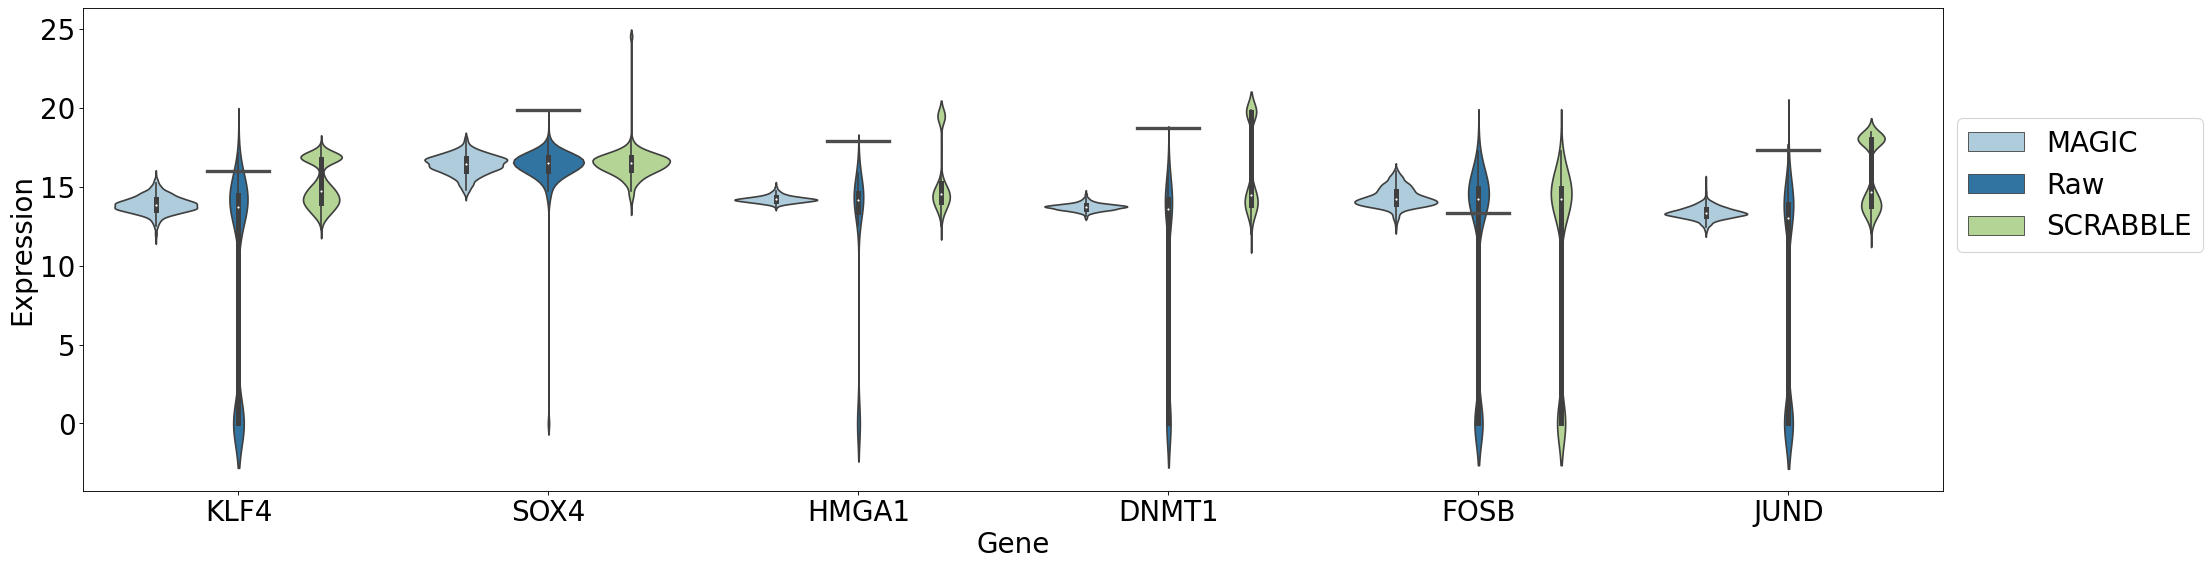

In [65]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 25}
matplotlib.rc('font', **font)
plt.figure(figsize=(30,8), dpi=80)

ax = sns.violinplot(x="Gene", y="Count", hue="key",
                 data=final_df, palette='Paired')

ax2 = sns.violinplot(x="Gene", y="Expression",
                 data=bulk_pl, width=0.2, linewidth=3, color='red' )

ax.legend(bbox_to_anchor=(1.00,0.8))

In [66]:
# Plotting examples of dropped out genes

dropouts = plot_low
d1 = []
for column in dropouts:
    dft = pd.DataFrame(transformed_dfs['magic'][column])
    dft['gene'] = column
    d1.append(dft)

for i in range(len(dropouts)):
    if i ==0:
        df_mag = d1[0]
        df_mag.columns = ['Count', 'Gene']
    else:
        df_mag2 = d1[i]
        df_mag2.columns = ['Count', 'Gene']
        df_mag =pd.concat([df_mag, df_mag2])
df_mag['key'] = 'MAGIC'


d2 = []
for column in dropouts:
    dft = pd.DataFrame(transformed_dfs['input'][column])
    dft['gene'] = column
    d2.append(dft)

for i in range(len(dropouts)):
    if i ==0:
        df_raw = d2[0]
        df_raw.columns = ['Count', 'Gene']
    else:
        df_raw2 = d2[i]
        df_raw2.columns = ['Count', 'Gene']
        df_raw =pd.concat([df_raw, df_raw2])
df_raw['key'] = 'Raw'



d3 = []
for column in dropouts:
    dft = pd.DataFrame(transformed_dfs['scrabble'][column])
    dft['gene'] = column
    d3.append(dft)

for i in range(len(dropouts)):
    if i ==0:
        df_scrab = d3[0]
        df_scrab.columns = ['Count', 'Gene']
    else:
        df_scrab2 = d3[i]
        df_scrab2.columns = ['Count', 'Gene']
        df_scrab =pd.concat([df_scrab, df_scrab2])
df_scrab['key'] = 'SCRABBLE'


final_df = pd.concat([df_mag, df_raw, df_scrab])

In [67]:
bulk_plot = (transformed_dfs['bulk']).T
bulk_plot = bulk_plot[plot_low]
bg_list = bulk_plot.columns
bulk_pl = bulk_plot.T
bulk_pl['Gene'] = bg_list

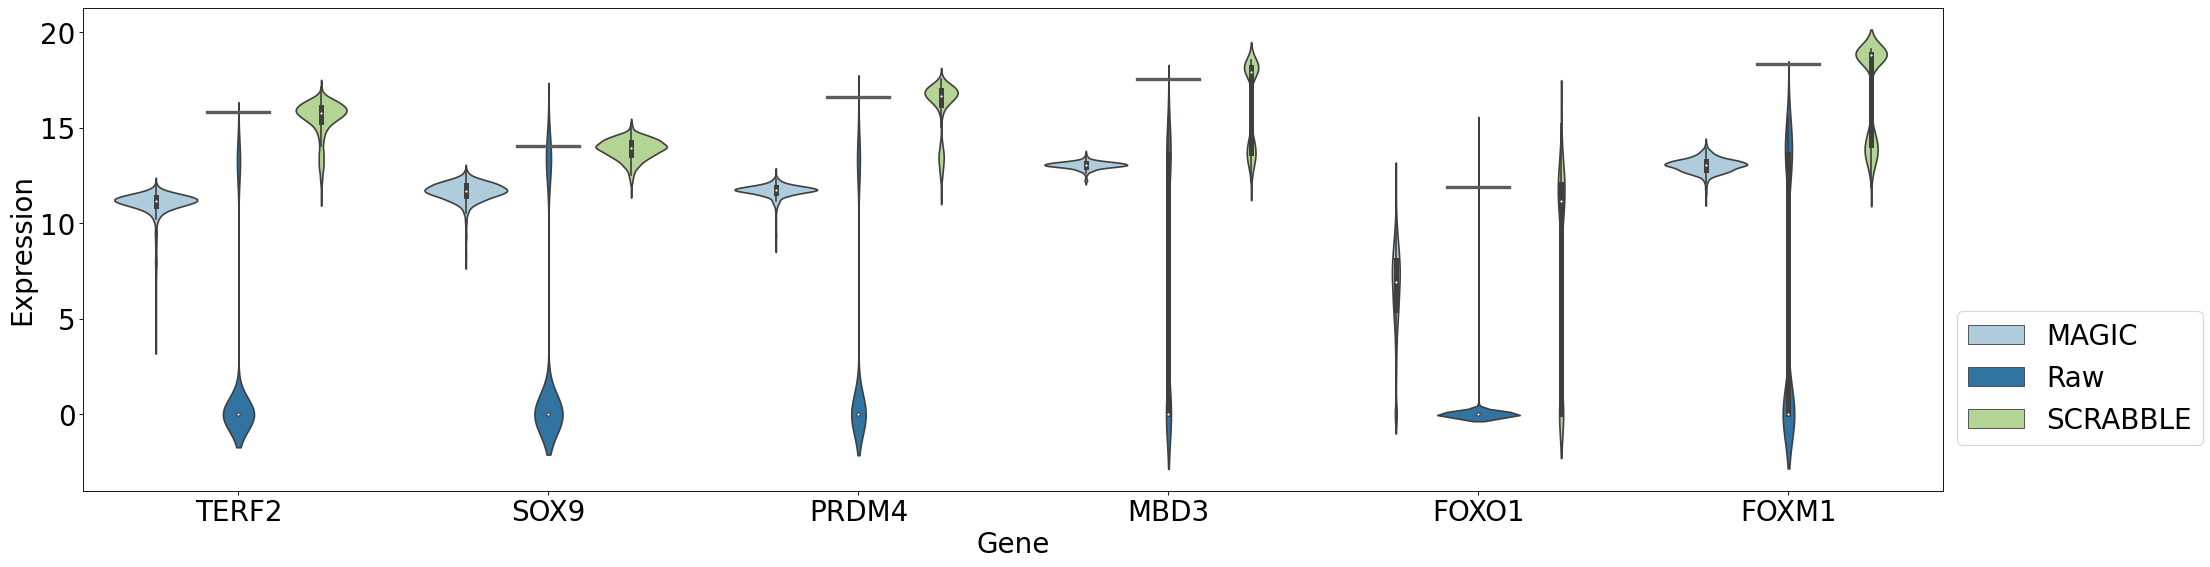

In [68]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 25}
matplotlib.rc('font', **font)
plt.figure(figsize=(30,8), dpi=80)



ax = sns.violinplot(x="Gene", y="Count", hue="key",
                 data=final_df, inner='box',  palette='Paired')

ax2 = sns.violinplot(x="Gene", y="Expression",
                 data=bulk_pl, width=0.2, linewidth=3, palette='hls', inner='stick' )

ax.legend(bbox_to_anchor=(1,0.4))